In [2]:
## A simple ML project using Linear Regression to predict a Major League Baseball 
## (MLB) team's win-loss percentage based on how many runs scored and
## runs allowed by the team 


import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# web parses table from baseball reference scores page
def parseYears(start, end):
    dataframeMLB = pd.DataFrame() # creates empty dataframe that will hold all the training data

    for year in range(start, end + 1):
        link = "https://www.baseball-reference.com/boxes/?month=11&day=1&year=" + str(year)
        data = requests.get(link)
        bs4 = BeautifulSoup(data.text, 'html.parser')
        idAL = "standings-upto-AL-overall"
        idNL = "standings-upto-NL-overall"

        # compiles data from both leagues
        tableAL = bs4.find('table', {'id': idAL})
        dataframeAL = pd.read_html(StringIO(str(tableAL)))[0]
        tableNL = bs4.find('table', {'id': idNL})
        dataframeNL = pd.read_html(StringIO(str(tableNL)))[0]

        dataframeMLB = pd.concat([dataframeMLB, dataframeAL, dataframeNL])
        
    return dataframeMLB



dataframeFIT = parseYears(2016, 2023)

dataframeTEST = parseYears(2000, 2001)


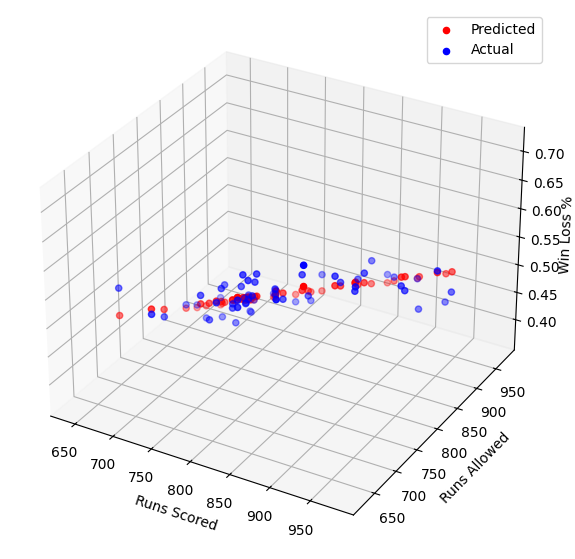

Mean squared error of 0.0005004828241230705

R square value of  0.8992998834322864


In [3]:
# isolate RS RA W-L%
rInputs = ["RS", "RA"]
x = dataframeFIT[rInputs] # inputs
y = dataframeFIT["W-L%"] # output

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

model = LinearRegression()

model.fit(x.values, y)

x_test = dataframeTEST[rInputs]
y_test = dataframeTEST["W-L%"]

y_pred = model.predict(x_test.values)
model.score(x_test.values, y_test)

fig = plt.figure(figsize= (7,7))
ax = plt.axes(projection = '3d')

ax.scatter(x_test["RS"], x_test["RA"], y_pred, label = 'Predicted', c = 'r')
ax.scatter(x_test["RS"], x_test["RA"], y_test, label = 'Actual', c = 'b')

ax.set_xlabel('Runs Scored')
ax.set_ylabel('Runs Allowed')
ax.set_zlabel('Win Loss %', labelpad = 0)

plt.legend()
plt.show()

print("Mean squared error of " + str(mean_squared_error(y_test, y_pred)))
print("\nR square value of  " + str(r2_score(y_test, y_pred)))


In [8]:
import numpy as np
# make predictions based off select points
y_pred = model.predict(np.array([[691, 781]]))
print("Predicted Win Loss perecent of: " + str(y_pred[0]))

Predicted Win Loss perecent of: 0.445244973623701
